<a href="https://colab.research.google.com/github/mattselph/ml-notebooks/blob/master/3_ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
Logistic Regression is a technique used in binary classification problems, like "hot dog" or "not hot dog."  The output of a logistic regression function is either a 1 (yes) or 0 (no).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

The way it generates a 1 or 0 is by passing feature values through a **sigmoid activation function**.  This function outputs either a 1 or 0 and is useful in classification problems.

Sigmoid activation function:

$$\phi(z)=\frac{1}{1+e^-z}$$

# Data
This will use the [Halloween candy dataset](https://github.com/mattselph/datasets/raw/master/candy-data.csv)

In [0]:
df = pd.read_csv('https://github.com/mattselph/datasets/raw/master/candy-data.csv')

In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


For this I'll use ```chocolate``` as the target and ```sugarpercent``` and ```pricepercent``` as the features to try and predict whether a piece of candy contains chocolate.

In [4]:
candy = df[['sugarpercent', 'pricepercent', 'chocolate']]
candy.head()

,sugarpercent,pricepercent,chocolate
0,0.732,0.860,1
1,0.604,0.511,1
2,0.011,0.116,0
3,0.011,0.511,0
4,0.906,0.511,0


# Question to Answer
Can the sugar percentage and price help determine if the candy contains chocolate?

## Preprocessing


In [0]:
# to split up the data you can also use sklearn.model_selction.train_test_split
from sklearn.model_selection import train_test_split

X = df[['sugarpercent', 'pricepercent']]
y = df['chocolate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The graph below shows a scatter plot where the orange means the target is 1 (contains chocolate), and the blue means the target is 0 (does not contain chocolate).  Logistic regression seeks to draw a curved boundary line to separate the 1 values from the 0 values.  

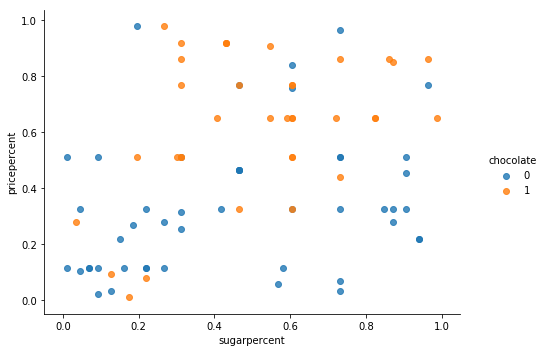

In [6]:
import seaborn as sns

sns.lmplot('sugarpercent', 'pricepercent', candy, hue='chocolate', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(8, 5)

## Train the Model

In [7]:
logregr = LogisticRegression(solver='lbfgs')

logregr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test the Model

In [8]:
y_pred = logregr.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

All 1's and 0's.  Compare that to ```y_test``` to see how accurate the model is.

## Evaluating the Model
Use ```sklearn.metrics``` again to see how accurate this model is.  Except, with logistic regression MSE is not applicable since it's a curved line.  Use ```accuracy_score```.

In [9]:
from sklearn.metrics import log_loss, accuracy_score

loss = accuracy_score(y_test, y_pred)
print("Model accuracy:  %.2f" % loss)

Model accuracy:  0.65


# Conclusion
The accuracy of this model is above.  You could probably use more features or different features to improve the accuracy if you wanted.